<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/12_18project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 데이터 탐색적 분석 (EDA)**

**1.1 데이터 구조 및 전처리**

In [65]:
# 라이브러리
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

pd.set_option("display.max_columns", 100)
sns.set_theme(style="whitegrid")


In [66]:
# 1) 데이터 로드
df = pd.read_csv("insurance.csv")

# 2) 데이터 기본 확인
print("shape:", df.shape)
display(df.head())
display(df.tail())

# 3) 컬럼/자료형/결측치 확인
display(df.info())
display(df.isna().sum())

# 4) 중복행 확인
print("duplicates:", df.duplicated().sum())


shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


duplicates: 1


전체 관측치 수: 1,338개

변수 수: 7개

모든 변수에서 Non-Null Count = 1,338

결측치 없음

**수치형 변수 (4개)**

age (int)

bmi (float)

children (int)

charges (float, 타깃 변수)

**범주형 변수 (3개)**

sex

smoker

region

In [67]:
df = df.copy()

# 문자열/공백 정리
df["smoker"] = df["smoker"].astype(str).str.strip().str.lower()

# 숫자형 변환 (문자열 섞여 있어도 강제로 숫자로)
df["bmi"] = pd.to_numeric(df["bmi"], errors="coerce")
df["charges"] = pd.to_numeric(df["charges"], errors="coerce")

# 분석에 필요한 값 결측 제거
df = df.dropna(subset=["smoker", "bmi", "charges"])

# smoker 값 필터링
df = df[df["smoker"].isin(["yes", "no"])]

# 확인
print(df[["bmi", "charges"]].dtypes)

bmi        float64
charges    float64
dtype: object


**1.2 수치형 변수 분포 분석**

In [68]:
# 5) 기초 통계량(수치형)
display(df.describe())

# 6) 범주형 값 분포
cat_cols = ["sex", "smoker", "region"]
for c in cat_cols:
    print(f"\n[{c}] value counts")
    display(df[c].value_counts())


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



[sex] value counts


,count
sex,
male,676
female,662



[smoker] value counts


,count
smoker,
no,1064
yes,274



[region] value counts


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


남성: 676명

여성: 662명

> 거의 1:1에 가까운 균형
성별에 따른 비교 분석 시 표본 불균형으로 인한 편향 가능성은 낮다고 판단된다.

비흡연자: 1,064명

흡연자: 274명

→ 약 4 : 1 비율

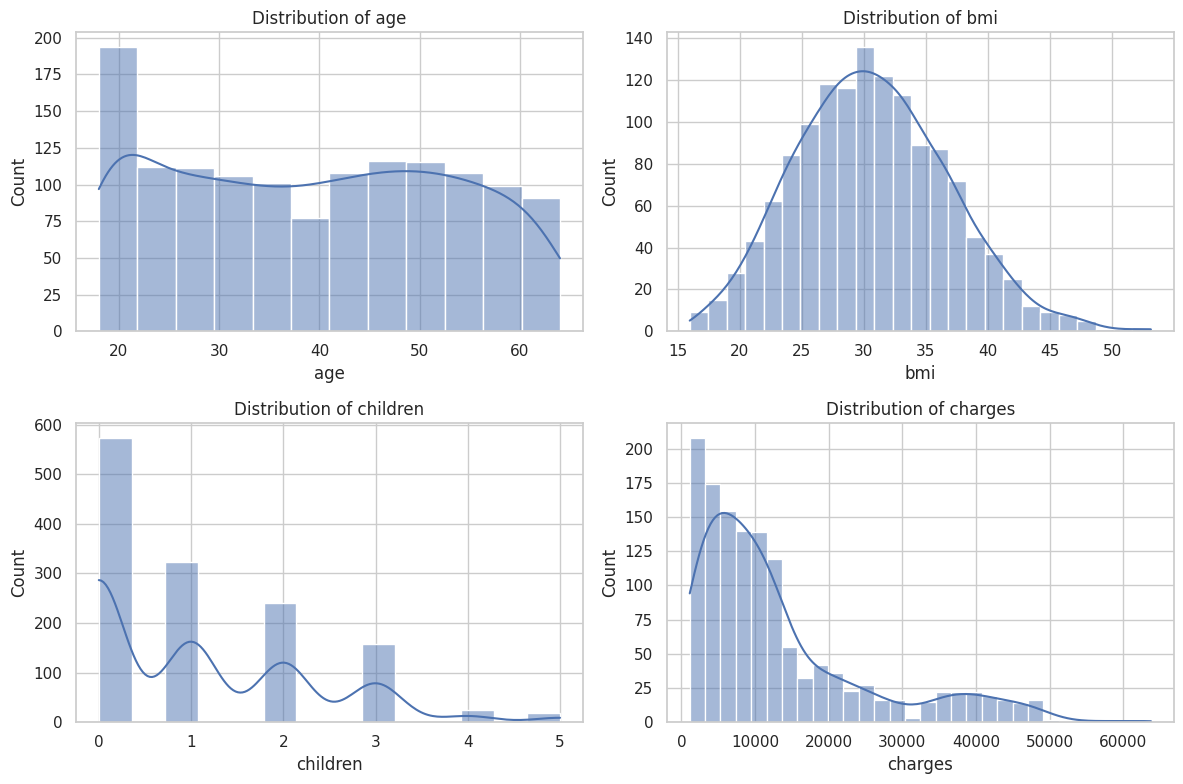

In [69]:
# 7) 수치형 분포 확인 (히스토그램 + KDE)
num_cols = ["age", "bmi", "children", "charges"]

plt.figure(figsize=(12, 8))
for i, c in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution of {c}")
plt.tight_layout()
plt.show()


age - 고르게 분포
bmi - 종 모양에 가까우나 약간의 오른쪽 꼬리로 40이상의 고 BMI 존재
children - 0이 가장 많다. 자녀 수가 증가할수록 빈도 감소
charges - 강한 오른쪽 꼬리 분포. 소수의 고액 의료비 관측치 존재

**1.3 시각화를 통한 관계 탐색**

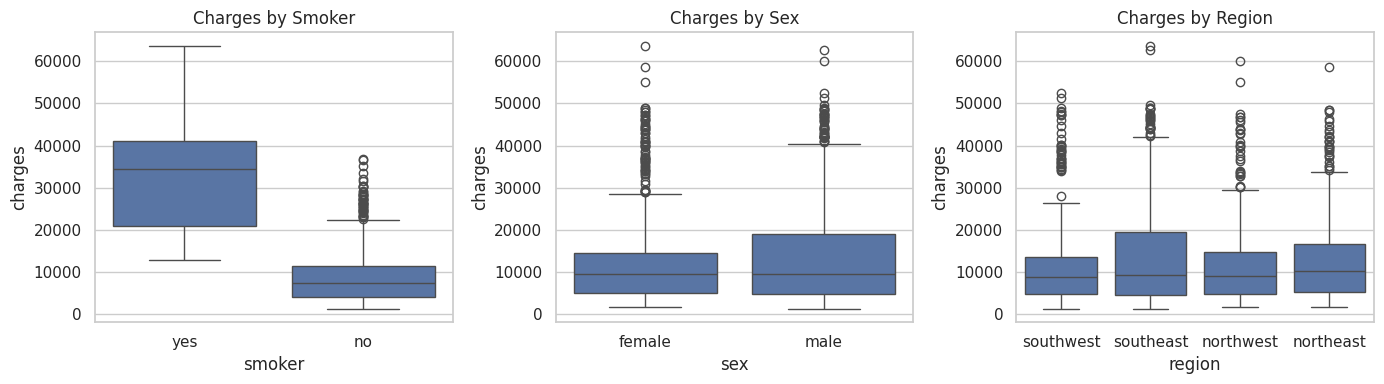

In [70]:
# 9) 집단 비교 시각화 (boxplot)
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Charges by Smoker")

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="sex", y="charges")
plt.title("Charges by Sex")

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="region", y="charges")
plt.title("Charges by Region")

plt.tight_layout()
plt.show()


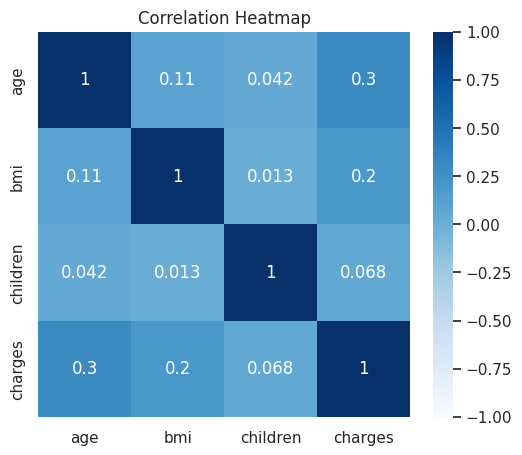

In [71]:
# 10) 상관관계(수치형만)
corr = df[["age", "bmi", "children", "charges"]].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


| 변수 쌍               |      상관계수 | 해석           |
| ------------------ | --------: | ------------ |
| age – charges      |  **0.30** | 중간 정도의 양의 상관 |
| bmi – charges      |  **0.20** | 약한 양의 상관     |
| children – charges | **0.068** | 거의 상관 없음     |
| age – bmi          |      0.11 | 매우 약한 상관     |
| age – children     |     0.042 | 거의 상관 없음     |
| bmi – children     |     0.013 | 거의 상관 없음     |



 상관분석에서는 연령과 의료비 간의 상관계수(r = 0.30)가 상대적으로 크게 나타난 반면, BMI와 의료비 간의 상관계수는 비교적 낮은 수준(r = 0.20)이었다. 그러나 산점도 분석을 통해
 BMI 30을 기준으로 의료비 분포가 분리되는 패턴이 관찰되어,
  비만 여부에 따른 의료비 평균 차이를 통계적으로 검증할 필요성이 제기되었다.

# **2. 가설 도출 및 정당화 — 조원 가설 연결 브리지**

**가설 1** BMI가 높을수록 의료비가 높다

**가설 2** 흡연자는 비흡연자보다 의료비가 높다

**가설 3** 흡연자의 BMI가 높을수록 의료비가 높다

# **3.가설검증**

# **3.1 가설1**

BMI가 높을수록 의료비가 높다

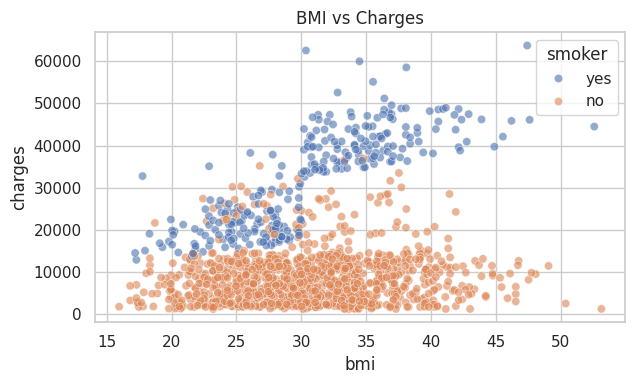

In [75]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker", alpha=0.6)
plt.title("BMI vs Charges")

plt.tight_layout()
plt.show()


**가설 설정 배경**
>BMI 증가에 따라 의료비가 증가하는 경향이 뚜렷함

>특히 BMI 30 전후를 기준으로 의료비 수준이 분리

>고BMI 구간에서 고액 의료비 관측치 다수 존재

BMI 기준:

비비만 그룹: BMI < 30

비만 그룹: BMI ≥ 30

종속 변수: charges (의료비)

**H₀** (귀무가설)
비만 여부(BMI ≥ 30)에 따른 의료비 평균 차이는 없다.

**H₁** (대립가설)
비만 여부(BMI ≥ 30)에 따라 의료비 평균 차이는 있다.

(1) BMI 기준 집단 변수 생성

In [76]:
df["obese"] = (df["bmi"] >= 30).astype(int)

# 집단 크기 확인
df["obese"].value_counts()


,count
obese,
1,707
0,631


0: 비비만

1: 비만

(2) 집단별 의료비 기초 통계

In [77]:
df.groupby("obese")["charges"].describe()


,count,mean,std,min,25%,50%,75%,max
obese,,,,,,,,
0,631.0,10713.666901,7843.536999,1121.8739,4436.6788,8604.48365,14850.087900,38245.59327
1,707.0,15552.335469,14552.321382,1131.5066,5194.6588,9964.06000,20068.166695,63770.42801


비만 그룹의 평균 의료비가 더 높에 나타남

(3) 정규성 간단 확인

In [78]:
from scipy.stats import shapiro

# 표본 크기 줄임 Shapiro
non_obese_sample = df.loc[df["obese"] == 0, "charges"].sample(300, random_state=42)
obese_sample = df.loc[df["obese"] == 1, "charges"].sample(300, random_state=42)

print("Non-obese:", shapiro(non_obese_sample))
print("Obese:", shapiro(obese_sample))


Non-obese: ShapiroResult(statistic=np.float64(0.9033694522424295), pvalue=np.float64(6.24196717870299e-13))
Obese: ShapiroResult(statistic=np.float64(0.7910924294113657), pvalue=np.float64(2.558472390692441e-19))


비비만 그룹 (BMI < 30)

W = 0.903

p-value ≈ 6.24 × 10⁻¹³

비만 그룹 (BMI ≥ 30)

W = 0.791

p-value ≈ 2.56 × 10⁻¹⁹

해석

두 집단 모두 p-value < 0.05

→ 정규성 가정 기각

정규성 검정 결과, 비비만 그룹과 비만 그룹 모두에서 의료비 분포가 정규성을 만족하지 않는 것으로 나타났다(p < 0.05). 이는 의료비 데이터가 정규분포 가정을 충족하지 않음을 의미한다. (종 모양X)

(4) 등분산성 검정 (Levene)

In [79]:
from scipy.stats import levene

non_obese = df.loc[df["obese"] == 0, "charges"]
obese = df.loc[df["obese"] == 1, "charges"]

stat, p = levene(non_obese, obese)
print(f"Levene test p-value: {p:.4f}")


Levene test p-value: 0.0000


p < 0.05 → 등분산 가정 불가

비비만 그룹은
의료비가 비교적 고르게 퍼져 있음

비만 그룹에선,
퍼짐이 훨씬 큼

따라서
두 그룹을 같은 기준으로 평균 비교하면 불공정하다 생각했다.

(5) 평균 차이 검정 (Welch t-test)

Welch t-test는 두 집단의 격차가 서로 달라도 상관없이 오차를 보정할 수 있는 공식이다.

In [80]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    non_obese,
    obese,
    equal_var=False  # Welch
)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")


t-statistic: -7.6792
p-value: 0.000000


# **3.2 가설1 결과**

Welch t-test 결과, 비만 여부에 따른 의료비 평균 차이는 통계적으로 유의미한 것으로 나타났다(t = -7.68, p < 0.001). 이에 따라 귀무가설을 기각하며, 비만 그룹의 의료비 평균이 비비만 그룹보다 유의미하게 높다고 판단할 수 있다.

t-statistic, p-value

귀무가설 기각

(6)회귀분석을 통한 관계 규명 및 예측

In [81]:
#변수 정의
X = df[["bmi"]]      # 독립변수
y = df["charges"]   # 종속변수


In [82]:
#단순 선형회귀
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

coef, intercept, r2


(np.float64(393.87303079739524),
 np.float64(1192.9372089611497),
 0.03933913991786264)

# **3.3 회귀분석 결과**

회귀계수(coef)
→ 393.87

절편(intercept)
→ 1192.94

결정계수(R²)
→ 0.0393

핵심 숫자

BMI 계수 = 393.87

다른 조건이 같을 때, BMI가 1 증가하면 의료비는 평균적으로 약 394달러 증가한다.

절편 = 1192.94

뜻:

BMI가 0일 때의 이론적인 의료비

한편 결정계수(R²)는 0.039로, BMI 단일 변수만으로는 의료비 변동의 일부만 설명할 수 있음

단순 선형회귀분석 결과, BMI는 의료비에 유의미한 양의 영향을 미치는 변수로 나타났으나, 결정계수가 낮아 의료비는 BMI 외에도 다양한 요인에 의해 설명됨을 확인할 수 있었다.

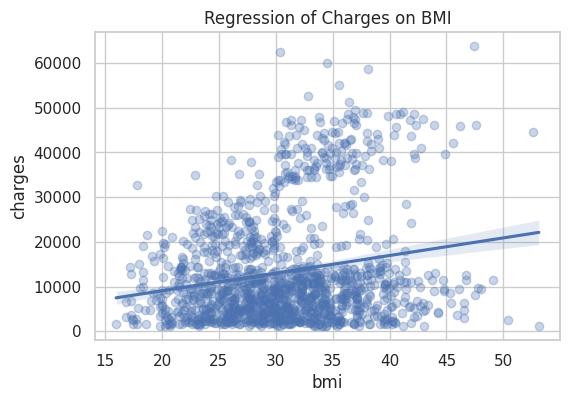

In [83]:
#시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.regplot(x="bmi", y="charges", data=df, scatter_kws={"alpha":0.3})
plt.title("Regression of Charges on BMI")
plt.show()


위 그림은 BMI를 독립변수로 한 단순 선형회귀 결과를 시각화한 것으로, BMI 증가에 따라 의료비가 증가하는 평균적인 추세를 보여준다. 다만 산점도가 회귀선 주변에 넓게 분포되어 있어, 의료비는 BMI 외에도 다양한 요인의 영향을 받는 것으로 해석된다.

**3.4 핵심 해석**

BMI는 의료비에 유의미한 영향을 미침

그러나 설명력은 제한적





BMI 단일 변수의 한계

의료비는 다요인 문제

흡연, 연령 등의 추가 요인 필요

# **4. 가설2**

**"1. 흡연자는 비흡연자보다 보험료(charges)가 높을 것이다”**

 **흡연 여부**는 건강 위험 요인으로 잘 알려져 있으나,

실제로 보험료(의료비)에 **얼마나 큰 차이를 만드는지**를 데이터로 확인할 필요가 있다. 이에  데이터를 확용하여**흡연자와 비흡연자의 보험료 차이가 통계적으로 유의미한지**를 검증하고자 한다.

2. **가설설정**

**귀무가설(H₀)**

: 흡연자와 비흡연자의 평균 보험료는 같다.

**대립가설(H₁)**

: 흡연자의 평균 보험료는 비흡연자보다 높다.

⇒두 집단의 평균을 비교하므로 **독립표본 t-test**를 사용한다.

3. **데이터 및 분석 방법**

 데이터 개괄

- 관측치 수: **1,338명**
- 주요 변수
    - `smoker`: 흡연 여부 (yes / no)
    - `charges`: 개인별 연간 보험료(의료비)

**4.1 데이터 탐색(EDA) 및 문제 정의**

<Figure size 700x500 with 0 Axes>

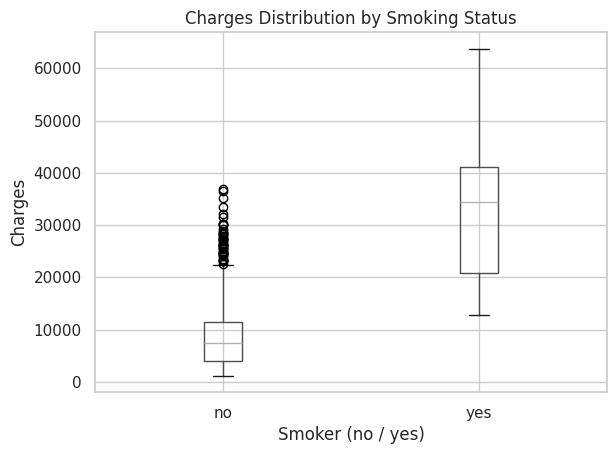

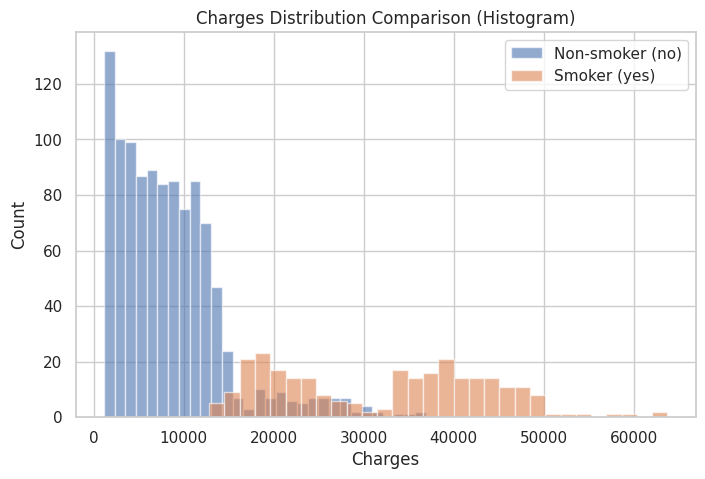

In [84]:
# 시각화 1: 흡연 여부에 따른 보험료 분포(Boxplot)
plt.figure(figsize=(7, 5))
df.boxplot(column="charges", by="smoker")
plt.title("Charges Distribution by Smoking Status")
plt.suptitle("")
plt.xlabel("Smoker (no / yes)")
plt.ylabel("Charges")
plt.show()

# 시각화 2: 히스토그램으로 분포 비교
charges_no = df.loc[df["smoker"] == "no", "charges"].to_numpy()
charges_yes = df.loc[df["smoker"] == "yes", "charges"].to_numpy()

plt.figure(figsize=(8, 5))
plt.hist(charges_no, bins=30, alpha=0.6, label="Non-smoker (no)")
plt.hist(charges_yes, bins=30, alpha=0.6, label="Smoker (yes)")
plt.title("Charges Distribution Comparison (Histogram)")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.legend()
plt.show()

히스토그램에서도 흡연자의 보험료 분포가 고비용 구간으로 이동해 있음

⇒시각화를 통해  두 집단 간 보험료 차이가 단순한 일부 사례가 아닌 **집단 전체의 구조적인 차이**

임을 확인.

**4.2 가설의 검증 : 독립표본 t-test (Welch)**

In [85]:
print("\n귀무가설(H₀): 흡연자와 비흡연자의 평균 보험료는 같다")
print("대립가설(H₁): 흡연자의 평균 보험료가 비흡연자보다 높다")

# 집단별 통계 요약
mean_no = charges_no.mean()
mean_yes = charges_yes.mean()

std_no = charges_no.std(ddof=1)
std_yes = charges_yes.std(ddof=1)

n_no = len(charges_no)
n_yes = len(charges_yes)

print("\n[집단별 요약 통계]")
print(f"Non-smoker (no): n={n_no}, mean={mean_no:,.2f}, std={std_no:,.2f}")
print(f"Smoker (yes):   n={n_yes}, mean={mean_yes:,.2f}, std={std_yes:,.2f}")
print(f"Mean difference (yes - no): {mean_yes - mean_no:,.2f}")

# Welch의 t-test (분산이 다를 수 있으므로 equal_var=False)
t_stat, p_two = ttest_ind(charges_yes, charges_no, equal_var=False)

# 단측 검정 p-value 계산 (흡연자 > 비흡연자)
p_one = p_two / 2 if t_stat > 0 else 1 - (p_two / 2)

print("\n[t-test 결과]")
print(f"t-statistic: {t_stat:.4f}")
print(f"two-sided p-value: {p_two:.6g}")
print(f"one-sided p-value (Smoker > Non-smoker): {p_one:.6g}")



귀무가설(H₀): 흡연자와 비흡연자의 평균 보험료는 같다
대립가설(H₁): 흡연자의 평균 보험료가 비흡연자보다 높다

[집단별 요약 통계]
Non-smoker (no): n=1064, mean=8,434.27, std=5,993.78
Smoker (yes):   n=274, mean=32,050.23, std=11,541.55
Mean difference (yes - no): 23,615.96

[t-test 결과]
t-statistic: 32.7519
two-sided p-value: 5.88946e-103
one-sided p-value (Smoker > Non-smoker): 2.94473e-103


In [86]:
#p-value를 이해하기 쉬운 구간으로 표현
print("\n[p-value 범주 해석]")
if p_one < 0.001:
    print("p-value < 0.001 (매우 유의미)")
elif p_one < 0.05:
    print("p-value < 0.05 (유의미)")
else:
    print("p-value ≥ 0.05 (유의미하지 않음)")

alpha = 0.05

print("\n[p-value 해석]")
if p_one < alpha:
    print(f"p-value < {alpha} → 귀무가설을 기각한다.")
else:
    print(f"p-value ≥ {alpha} → 귀무가설을 기각할 수 없다.")



[p-value 범주 해석]
p-value < 0.001 (매우 유의미)

[p-value 해석]
p-value < 0.05 → 귀무가설을 기각한다.


**독립표본 t-test 결과 분석**

[집단별 요약]

- 비흡연자 평균 보험료: **약 8,434**
- 흡연자 평균 보험료: **약 32,050**
- 평균 차이: **약 23,616**

### p-value 결과

- **p-value < 0.001**
- 유의수준 0.05보다 훨씬 작은 값

> “흡연자와 비흡연자의 평균 보험료 차이는
>
>
> 우연에 의해 발생했을 가능성이 매우 낮다.”
>

**4.4 효과 크기(Cohen's d) + 평균 비교 시각화**


[효과 크기] Cohen's d = 3.1613


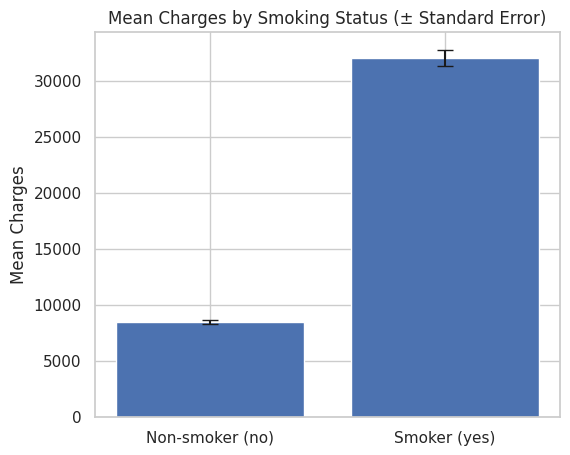

In [87]:
# 효과 크기(Cohen's d) 계산
pooled_sd = np.sqrt(
    ((n_yes - 1) * std_yes**2 + (n_no - 1) * std_no**2) / (n_yes + n_no - 2)
)
cohens_d = (mean_yes - mean_no) / pooled_sd
print(f"\n[효과 크기] Cohen's d = {cohens_d:.4f}")

# 시각화 3: 평균 비교 그래프 (표준오차 포함)
se_no = std_no / np.sqrt(n_no)
se_yes = std_yes / np.sqrt(n_yes)

plt.figure(figsize=(6, 5))
plt.bar(
    ["Non-smoker (no)", "Smoker (yes)"],
    [mean_no, mean_yes],
    yerr=[se_no, se_yes],
    capsize=6
)
plt.title("Mean Charges by Smoking Status (± Standard Error)")
plt.ylabel("Mean Charges")
plt.show()


흡연자의 평균 보험료는 비흡연자보다 약 4배 가까이 높음 (비흡연자: 약 8,434 VS 흡연자:약 32,050)

# **4.5 결론**

- p-value < 0.001로 나타나**귀무가설을 기각**하고 대립가설을 채택
- 즉, **흡연자는 비흡연자보다 통계적으로 유의미하게 높은 보험료를 부담한다**

### 시사점

- 흡연 여부는 보험료 산정에 중요한 요인임을 데이터로 확인
- 건강 행동 변화(금연)는 개인 의료비 부담 감소로 이어질 수 있음
- 보험 정책 및 건강 관리 전략 수립 시 활용 가능

# **5. 가설 3 흡연자의 BMI가 높을수록 의료비가 높다**

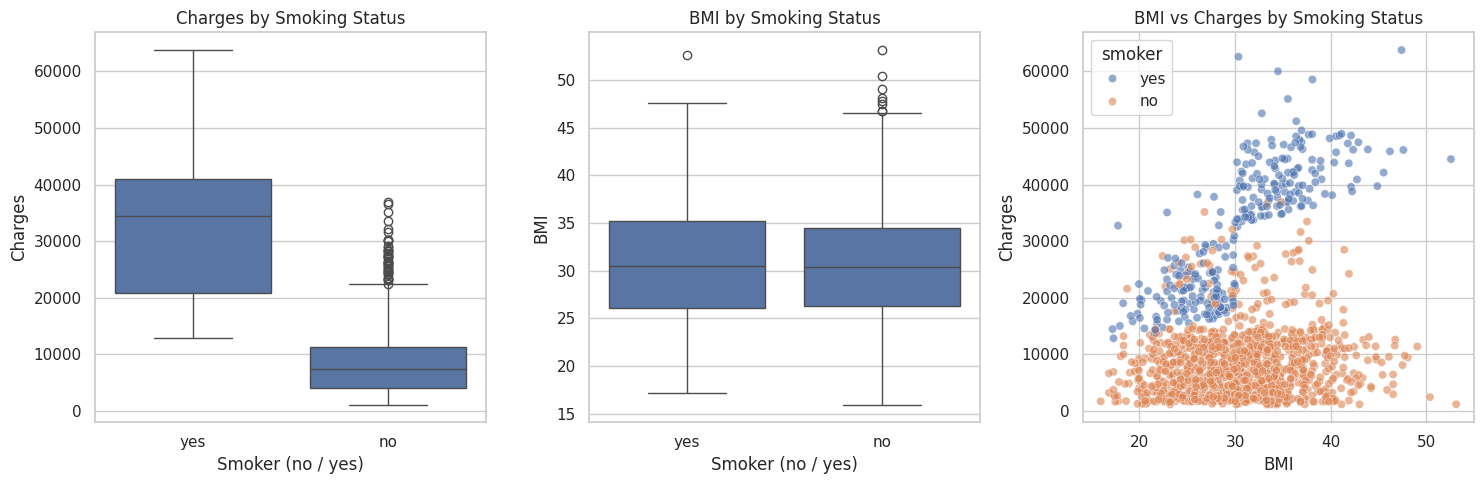

In [88]:

import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 1) 시각화 설정
# ------------------------------------------------------------
plt.figure(figsize=(15, 5))

# ------------------------------------------------------------
# 2) Boxplot 1: 흡연 여부에 따른 의료비(charges) 분포
# ------------------------------------------------------------
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Charges by Smoking Status")
plt.xlabel("Smoker (no / yes)")
plt.ylabel("Charges")

# ------------------------------------------------------------
# 3) Boxplot 2: 흡연 여부에 따른 BMI 분포
# ------------------------------------------------------------
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="smoker", y="bmi")
plt.title("BMI by Smoking Status")
plt.xlabel("Smoker (no / yes)")
plt.ylabel("BMI")

# ------------------------------------------------------------
# 4) Scatterplot: BMI와 의료비 관계 (흡연 여부 색상 구분)
# ------------------------------------------------------------
plt.subplot(1, 3, 3)
sns.scatterplot(
    data=df,
    x="bmi",
    y="charges",
    hue="smoker",
    alpha=0.6
)
plt.title("BMI vs Charges by Smoking Status")
plt.xlabel("BMI")
plt.ylabel("Charges")

# ------------------------------------------------------------
# 5) 레이아웃 정리 및 출력
# ------------------------------------------------------------
plt.tight_layout()
plt.show()


# 첫번째 boxplot
흡연 여부에 따른 의료비 분포를 비교한 결과,

흡연자(smoker=1) 집단의 의료비 중앙값과 사분위 범위가 비흡연자(smoker=0) 집단보다 현저히 높게 나타났다.

또한, 흡연자 집단은 의료비의 분산이 크고 고액 의료비 사례가 다수 존재하는 반면, 비흡연자 집단은 상대적으로 낮은 의료비 수준에 집중되어 있다.

이는 흡연 여부가 의료비 수준을 구분하는 중요한 요인임을 시사한다.
# 두번째 boxplot
흡연자와 비흡연자 간 BMI 분포를 비교한 결과, 두 집단의 BMI 중앙값과 분포는 큰 차이를 보이지 않았다.
즉, 흡연자 집단의 의료비가 더 높은 이유가 단순히 BMI가 더 높기 때문이라고 보기는 어렵다.

이 결과는 흡연 여부 자체가 BMI와 독립적으로 의료비에 영향을 미치거나,
혹은 BMI가 의료비에 미치는 효과가 흡연 여부에 따라 다르게 작용할 가능성을 시사한다.

#세번째 scatterplot
BMI와 의료비 간의 관계를 흡연 여부에 따라 시각화한 결과, 두 집단 간 뚜렷한 기울기 차이가 관찰되었다.

비흡연자(smoker=0):
BMI가 증가함에 따라 의료비가 완만하게 증가하는 경향을 보인다.

흡연자(smoker=1):
BMI 증가에 따라 의료비가 훨씬 가파르게 상승하며, 고액 의료비 사례가 집중적으로 나타난다.

이는 동일한 BMI 증가라도 흡연자 집단에서 의료비 증가 효과가 더 크게 나타남을 시각적으로 보여주며,
BMI와 흡연 여부 간 상호작용 효과(interaction) 가 존재할 가능성을 강하게 시사한다.

### 가설 설정
귀무가설 : BMI가 의료비에 미치는 영향은 흡연 여부와 무관하다.
(BMI × smoker 상호작용 효과는 0이다.)


대립가설 : BMI가 의료비에 미치는 영향은 흡연 여부에 따라 다르다.
(BMI × smoker 상호작용 효과는 0이 아니다.)